In [100]:
import zipfile
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
from tensorflow.keras import models,layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [101]:
local_zip = "data.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./data")
zip_ref.close()

In [102]:
no_dir = os.path.join("data/no")
yes_dir = os.path.join("data/yes")

train_names = os.listdir(no_dir)
print(train_names[:10])

test_names = os.listdir(yes_dir)
print(test_names[:10])

['no0.jpg', 'no1.jpg', 'no10.jpg', 'no100.jpg', 'no1000.jpg', 'no1001.jpg', 'no1002.jpg', 'no1003.jpg', 'no1004.jpg', 'no1005.jpg']
['y0.jpg', 'y1.jpg', 'y10.jpg', 'y100.jpg', 'y1000.jpg', 'y1001.jpg', 'y1002.jpg', 'y1003.jpg', 'y1004.jpg', 'y1005.jpg']


In [103]:
dataset = []
label = []

In [104]:
for i, image_name in enumerate(os.listdir(no_dir)):
    if(image_name.split('.')[1]=='jpg'):
        image = cv2.imread(os.path.join(no_dir, image_name))
        image = Image.fromarray(image,'RGB')
        image = image.resize((128,128))
        dataset.append(np.array(image))
        label.append(0)

In [105]:
for i, image_name in enumerate(os.listdir(yes_dir)):
    if(image_name.split(".")[1] == "jpg"):
        image = cv2.imread(os.path.join(yes_dir, image_name))
        image = Image.fromarray(image, "RGB")
        image = image.resize((128, 128))
        dataset.append(np.array(image))
        label.append(1)

In [106]:
dataset = np.array(dataset)
label = np.array(label)

print("Dataset: ", len(dataset))
print("Label: ", len(label))

Dataset:  3000
Label:  3000


In [107]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=.2)

In [108]:
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [109]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 127008)            0         
                                                                 
 dense_12 (Dense)            (None, 64)                8128576   
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                      

In [111]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"]
             )

In [114]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
75/75 [==============================] - 13s 170ms/step - loss: 0.4898 - accuracy: 0.7821
Epoch 2/5
75/75 [==============================] - 13s 171ms/step - loss: 0.1966 - accuracy: 0.9237
Epoch 3/5
75/75 [==============================] - 13s 176ms/step - loss: 0.1069 - accuracy: 0.9638
Epoch 4/5
75/75 [==============================] - 13s 174ms/step - loss: 0.0646 - accuracy: 0.9812
Epoch 5/5
75/75 [==============================] - 14s 180ms/step - loss: 0.0462 - accuracy: 0.9875


In [115]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 1s 51ms/step - loss: 0.1108 - accuracy: 0.9717


[0.11084817349910736, 0.971666693687439]

In [127]:
def make_prediction(img):
    img = cv2.imread(img)
    img=Image.fromarray(img)
    img=img.resize((128, 128))
    img=np.array(img)
    input_img = np.expand_dims(img, axis=0)
    plt.imshow(img)
    plt.show()
    res = model.predict(input_img)
    if res:
        print("Tumor")
    else:
        print("No tumor")

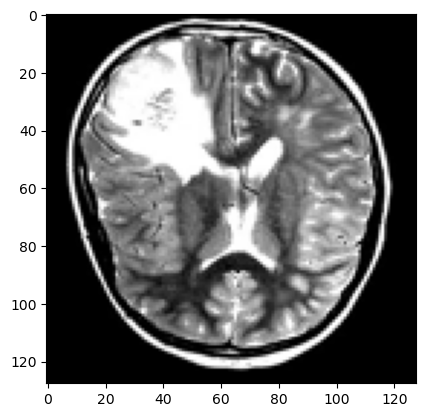

1/1 [==============================] - 0s 19ms/step
Tumor


In [131]:
make_prediction(os.path.join(yes_dir, "y0.jpg"))

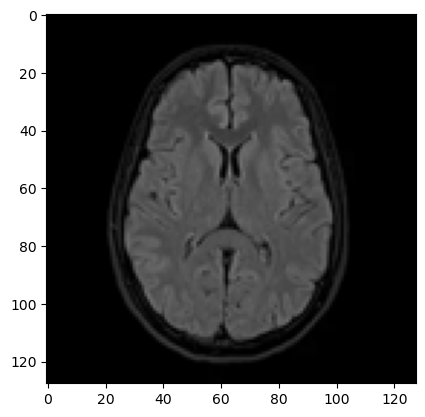

1/1 [==============================] - 0s 20ms/step
No tumor


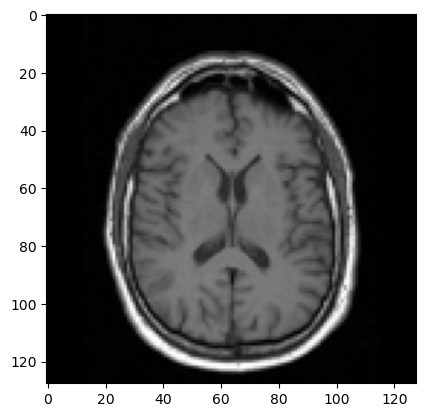

1/1 [==============================] - 0s 23ms/step
No tumor


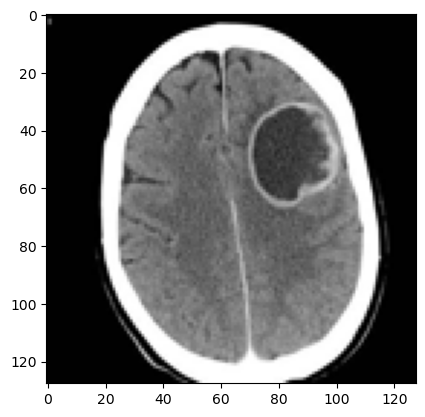

1/1 [==============================] - 0s 26ms/step
Tumor


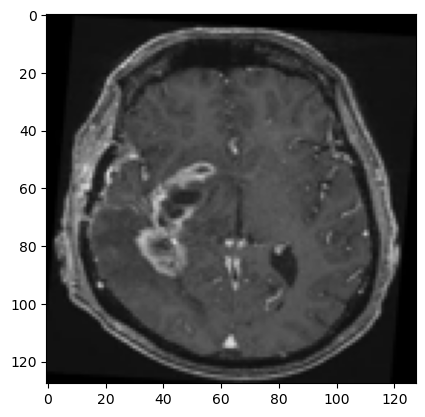

1/1 [==============================] - 0s 24ms/step
Tumor


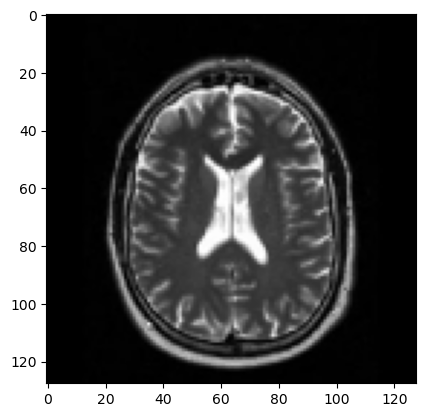

1/1 [==============================] - 0s 24ms/step
No tumor


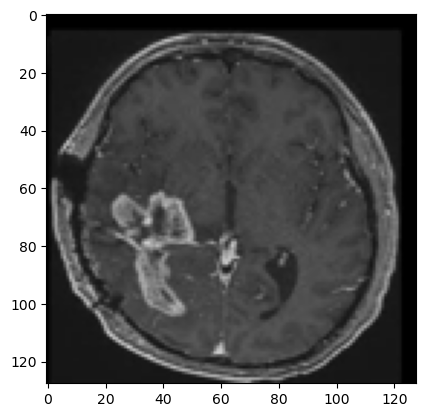

1/1 [==============================] - 0s 25ms/step
Tumor


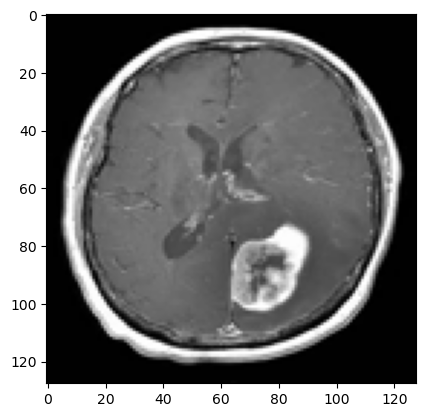

1/1 [==============================] - 0s 23ms/step
Tumor


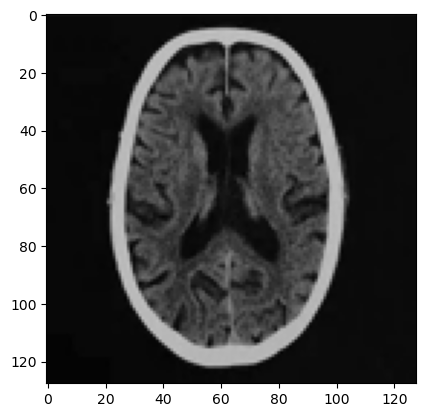

1/1 [==============================] - 0s 25ms/step
No tumor


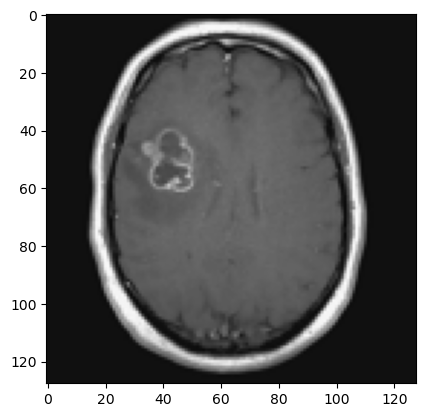

1/1 [==============================] - 0s 20ms/step
Tumor


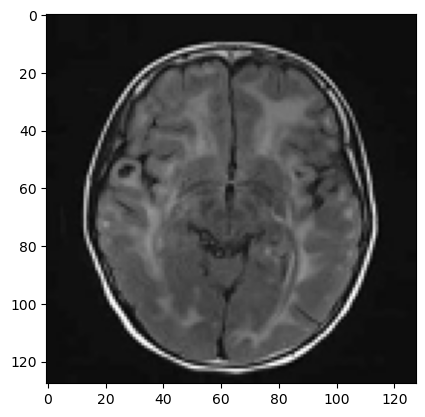

1/1 [==============================] - 0s 23ms/step
Tumor


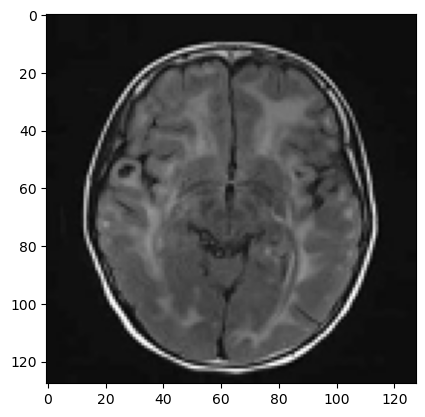

1/1 [==============================] - 0s 21ms/step
Tumor


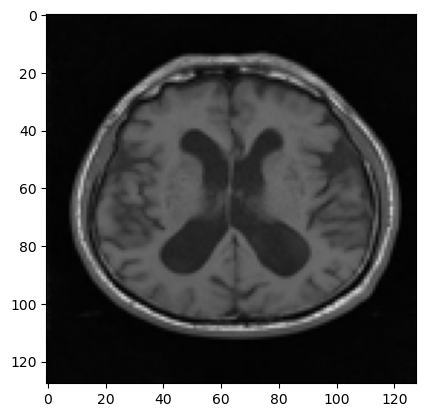

1/1 [==============================] - 0s 20ms/step
No tumor


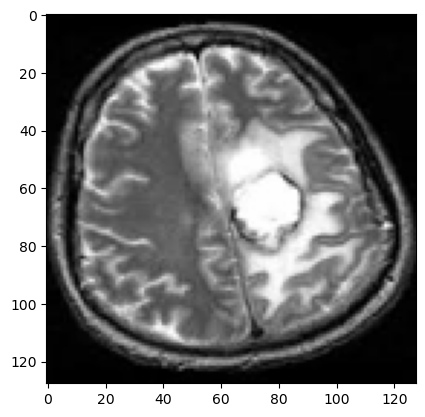

1/1 [==============================] - 0s 23ms/step
Tumor


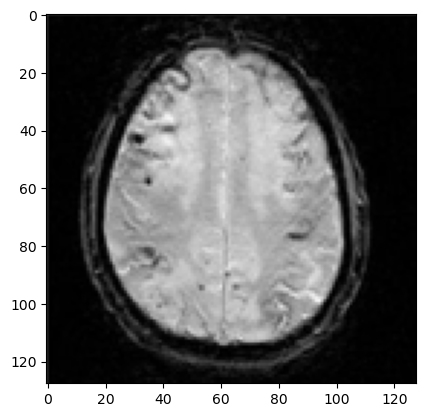

1/1 [==============================] - 0s 21ms/step
No tumor


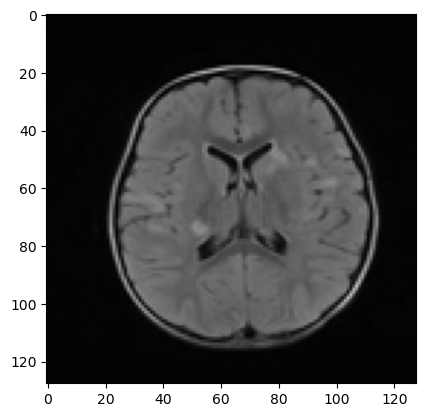

1/1 [==============================] - 0s 25ms/step
No tumor


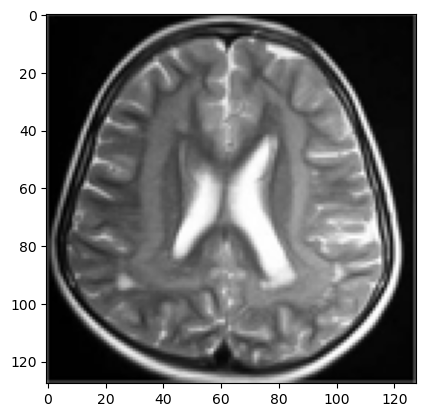

1/1 [==============================] - 0s 17ms/step
Tumor


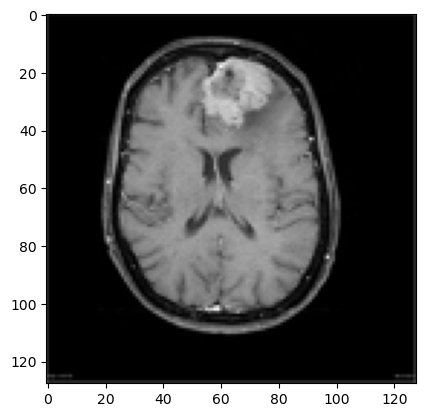

1/1 [==============================] - 0s 18ms/step
No tumor


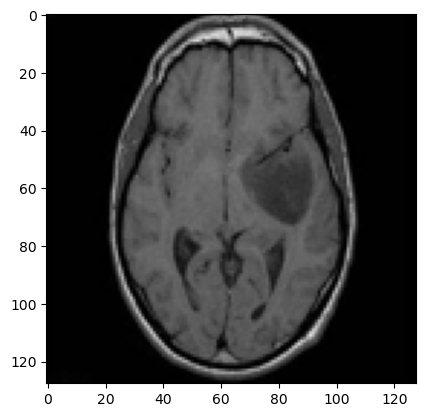

1/1 [==============================] - 0s 18ms/step
No tumor


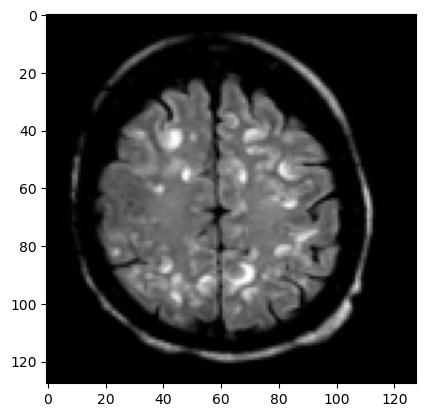

1/1 [==============================] - 0s 25ms/step
No tumor


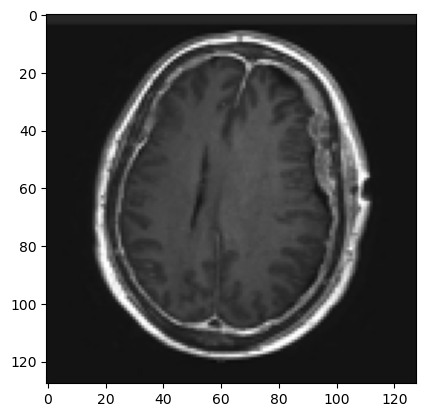

1/1 [==============================] - 0s 18ms/step
No tumor


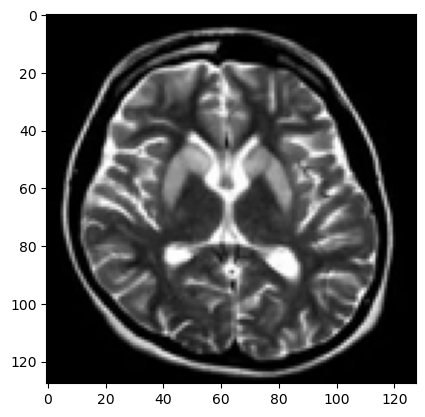

1/1 [==============================] - 0s 19ms/step
No tumor


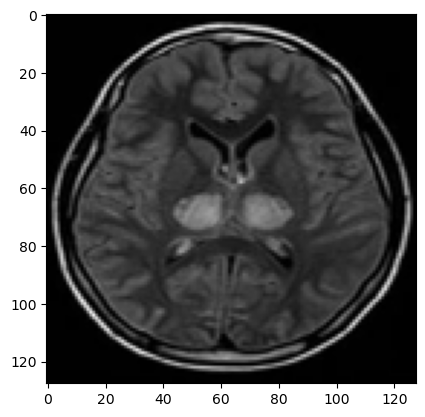

1/1 [==============================] - 0s 25ms/step
Tumor


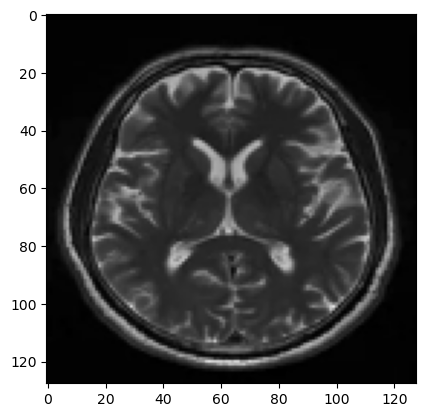

1/1 [==============================] - 0s 25ms/step
No tumor


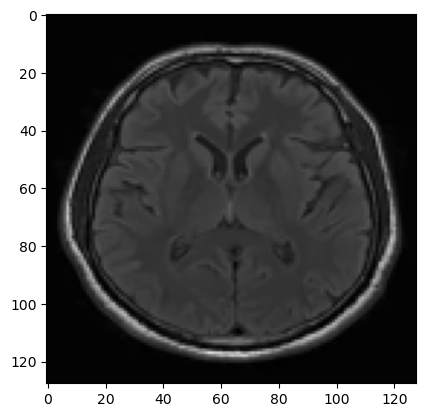

1/1 [==============================] - 0s 29ms/step
No tumor


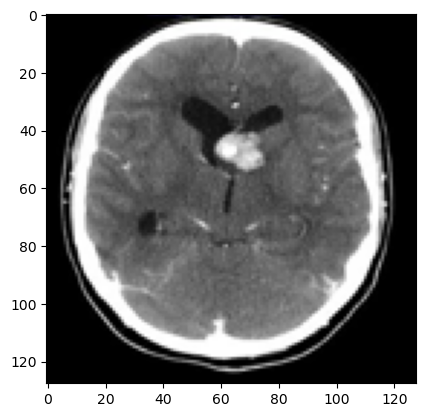

1/1 [==============================] - 0s 24ms/step
Tumor


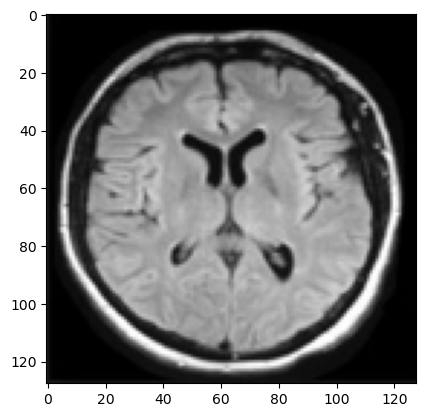

1/1 [==============================] - 0s 24ms/step
No tumor


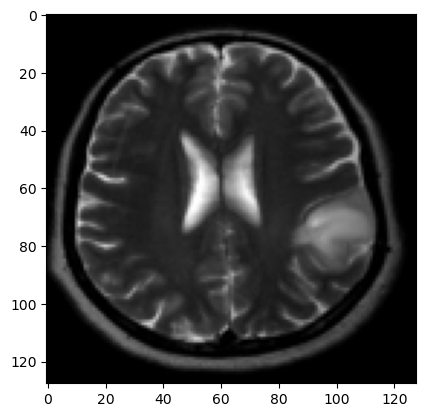

1/1 [==============================] - 0s 18ms/step
No tumor


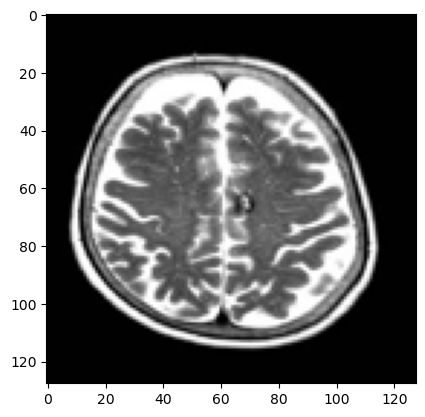

1/1 [==============================] - 0s 22ms/step
No tumor


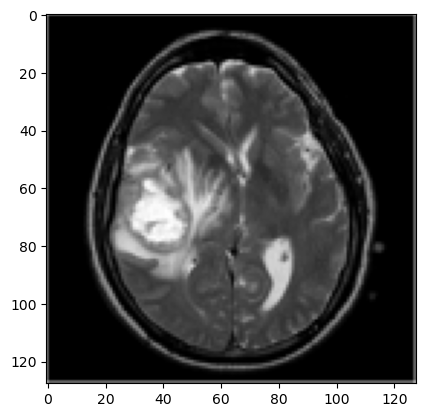

1/1 [==============================] - 0s 19ms/step
Tumor


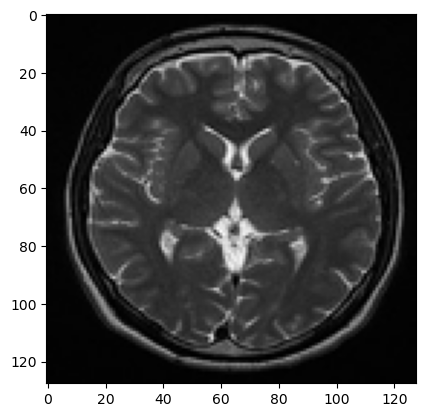

1/1 [==============================] - 0s 23ms/step
No tumor


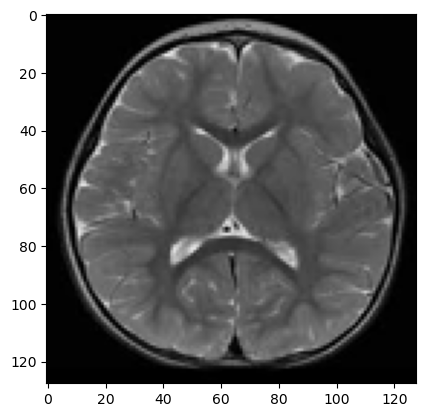

1/1 [==============================] - 0s 19ms/step
No tumor


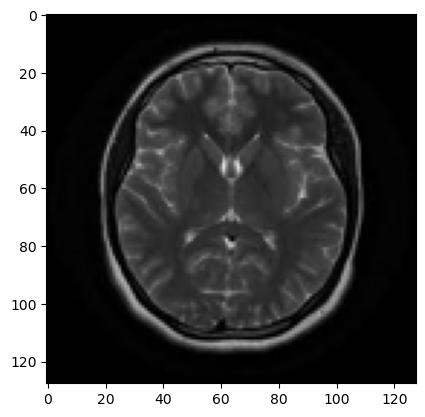

1/1 [==============================] - 0s 22ms/step
No tumor


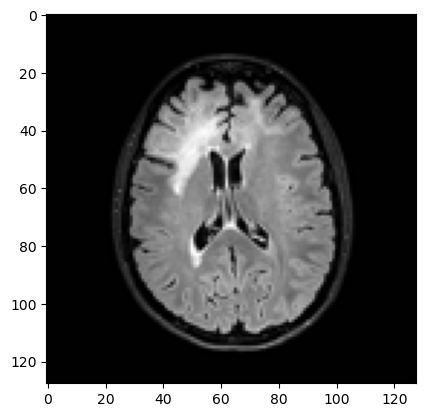

1/1 [==============================] - 0s 21ms/step
No tumor


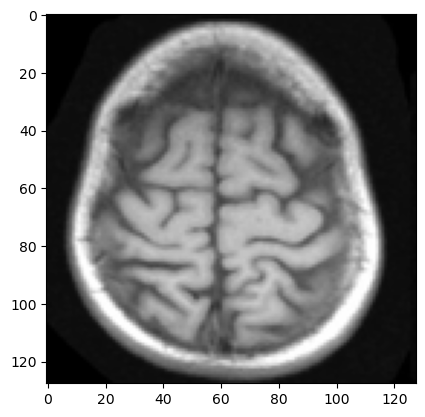

1/1 [==============================] - 0s 31ms/step
Tumor


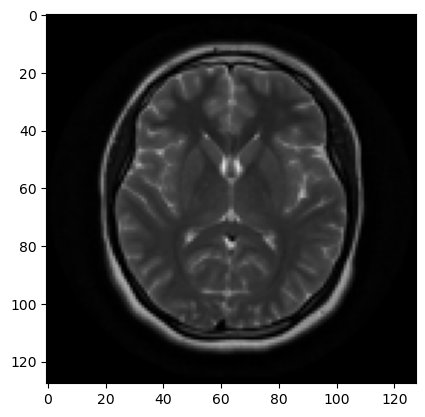

1/1 [==============================] - 0s 18ms/step
No tumor


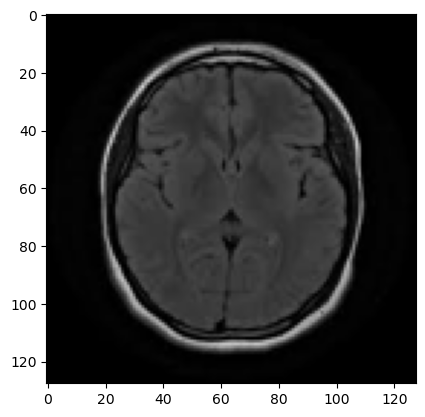

1/1 [==============================] - 0s 20ms/step
No tumor


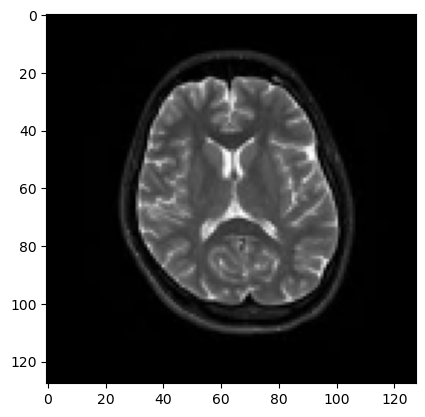

1/1 [==============================] - 0s 20ms/step
No tumor


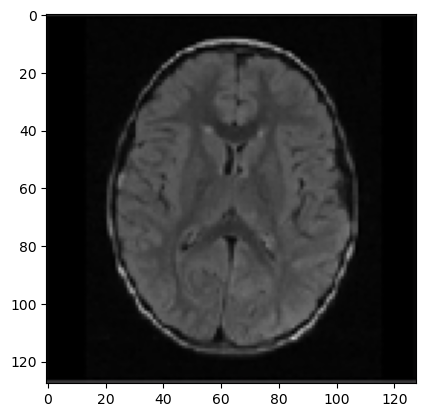

1/1 [==============================] - 0s 19ms/step
No tumor


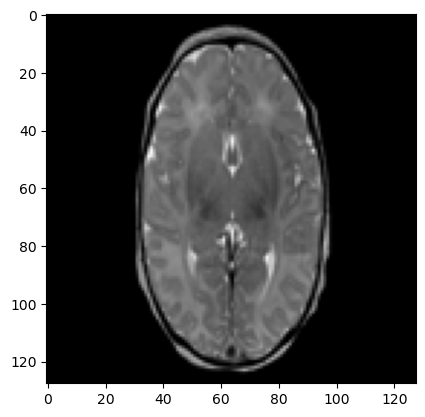

1/1 [==============================] - 0s 25ms/step
No tumor


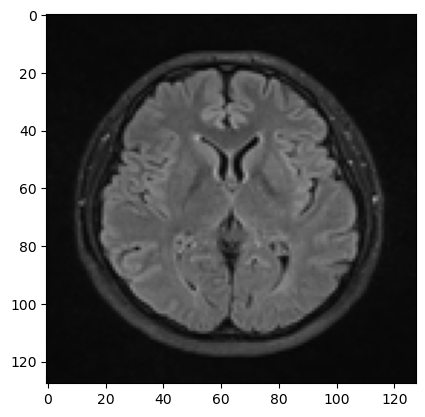

1/1 [==============================] - 0s 19ms/step
No tumor


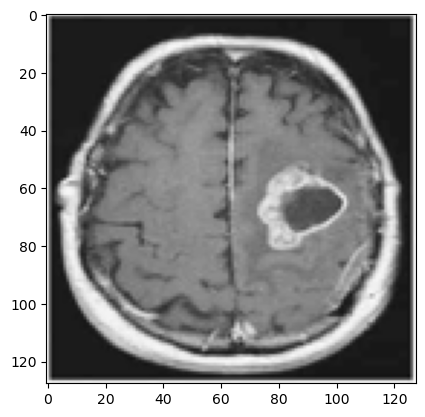

1/1 [==============================] - 0s 19ms/step
Tumor


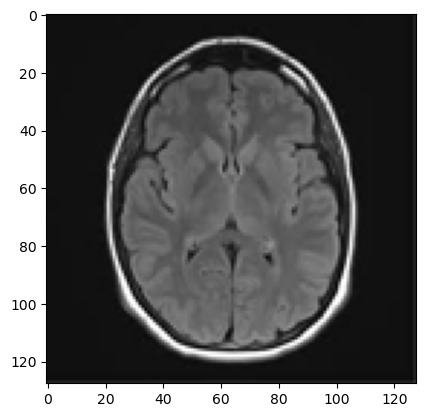

1/1 [==============================] - 0s 19ms/step
No tumor


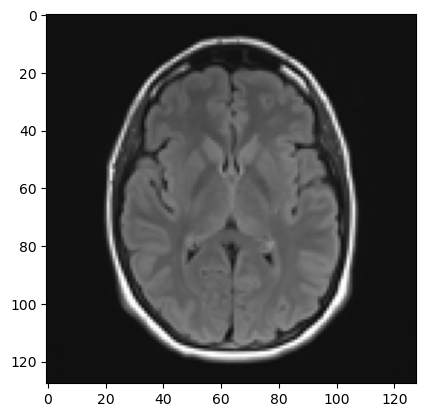

1/1 [==============================] - 0s 19ms/step
No tumor


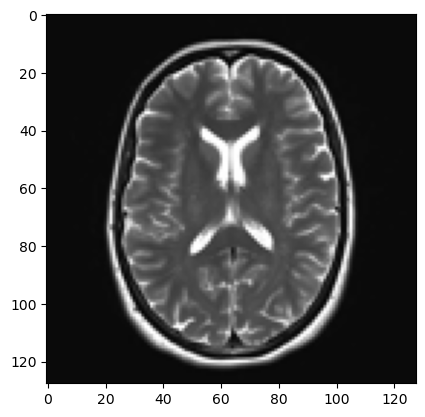

1/1 [==============================] - 0s 27ms/step
No tumor


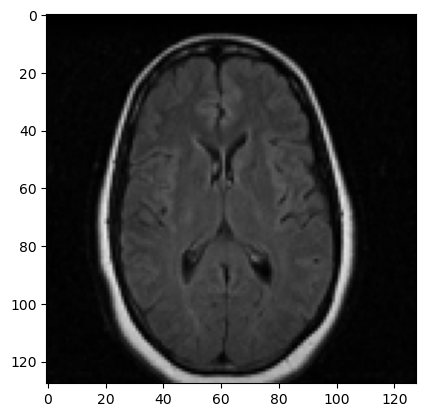

1/1 [==============================] - 0s 22ms/step
No tumor


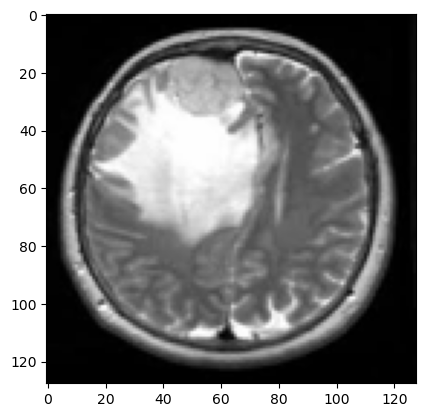

1/1 [==============================] - 0s 19ms/step
Tumor


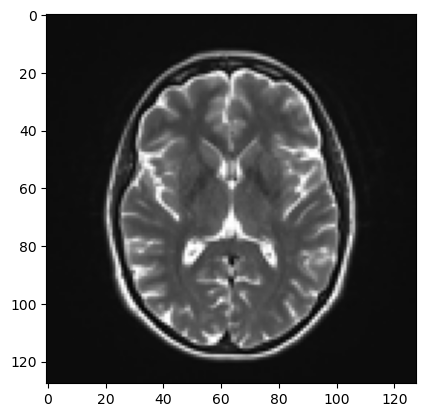

1/1 [==============================] - 0s 24ms/step
No tumor


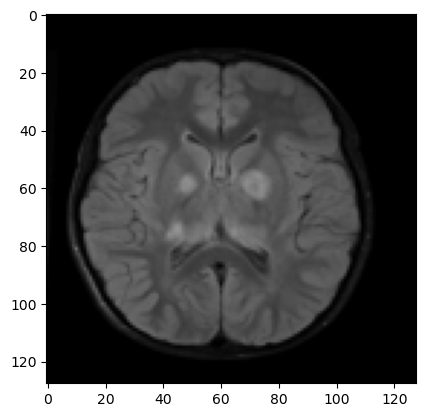

1/1 [==============================] - 0s 18ms/step
No tumor


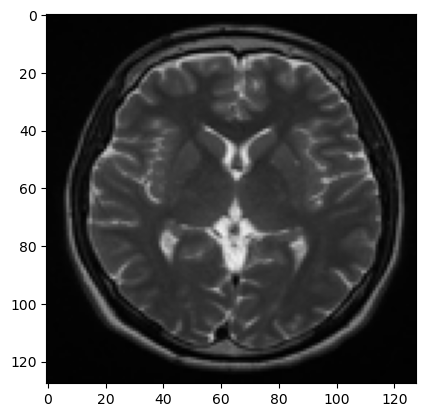

1/1 [==============================] - 0s 21ms/step
No tumor


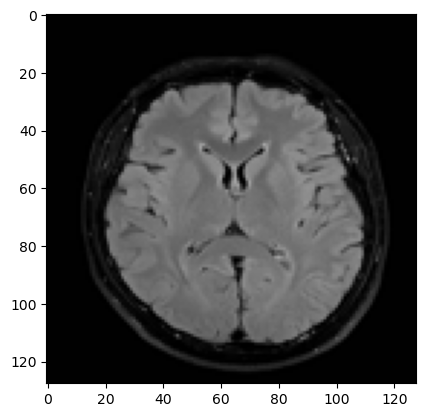

1/1 [==============================] - 0s 18ms/step
No tumor


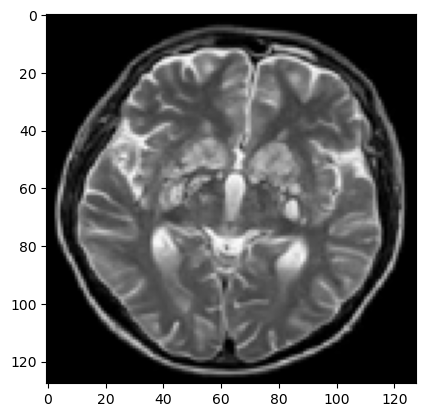

1/1 [==============================] - 0s 25ms/step
No tumor


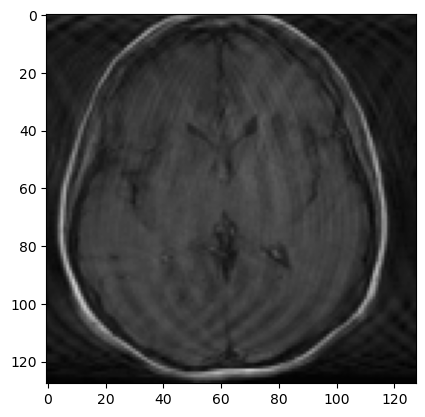

1/1 [==============================] - 0s 20ms/step
Tumor


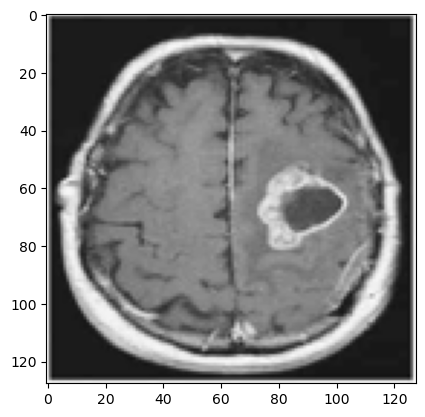

1/1 [==============================] - 0s 21ms/step
Tumor


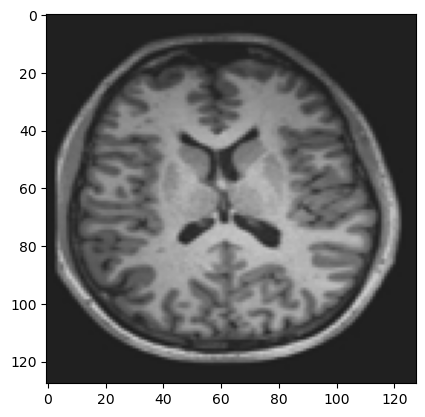

1/1 [==============================] - 0s 18ms/step
No tumor


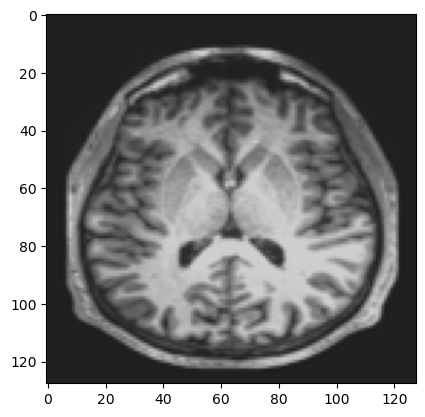

1/1 [==============================] - 0s 21ms/step
No tumor


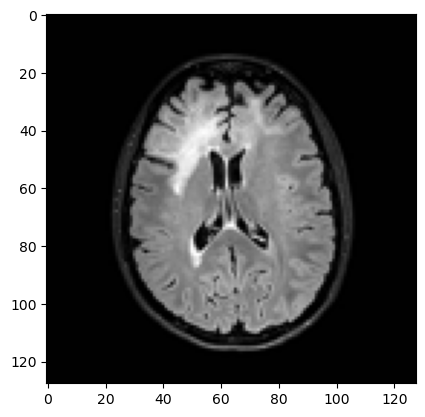

1/1 [==============================] - 0s 19ms/step
No tumor


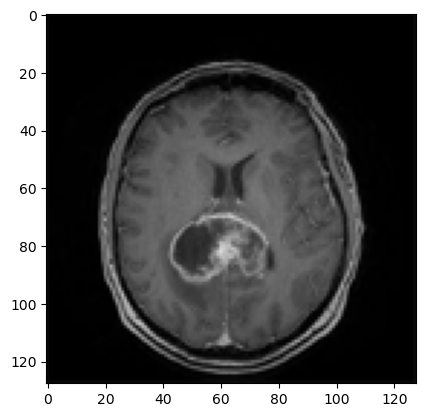

1/1 [==============================] - 0s 19ms/step
Tumor


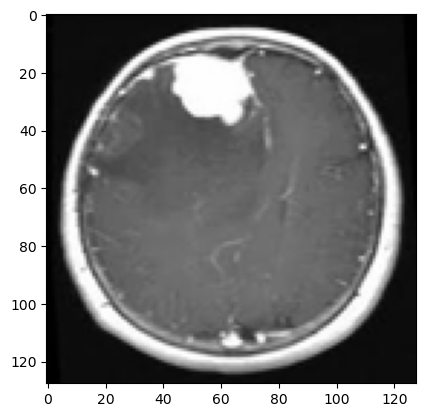

1/1 [==============================] - 0s 19ms/step
Tumor


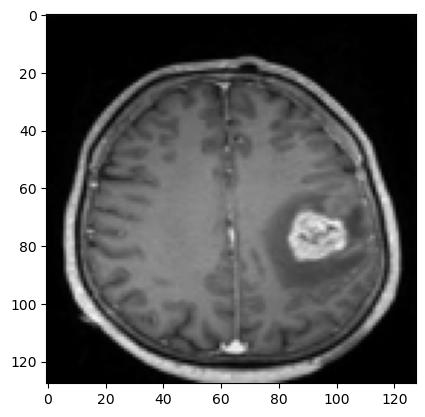

1/1 [==============================] - 0s 18ms/step
No tumor


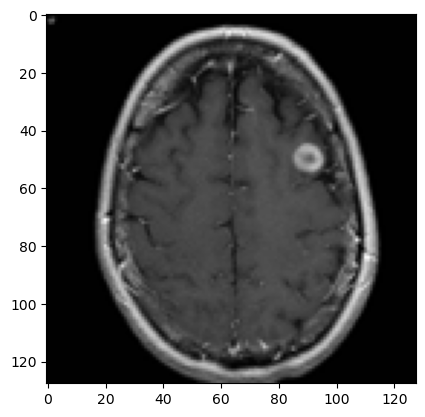

1/1 [==============================] - 0s 27ms/step
Tumor


In [133]:
for img in os.listdir(os.path.join("./data/pred")):
    make_prediction(os.path.join("./data/pred", img))